# IntroStat Week 1 Python

Welcome to the first lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 1.


### First steps using python code

In [ ]:
# Addition
2+3

In [ ]:
# Define a variable
x = 3

In [ ]:
# print out the value of the variable
print(x)

In [ ]:
print(type(x))

In [ ]:
# try changing x to 3.8 and see what happens to the type

Notice how jupyter notebooks work in two **modes**: **command** mode and **edit** mode. <br>

To enter command mode press **esc** <br>

To enter edit mode press **enter** <br>

(you can also use the mouse/clicking for most tasks)

In [ ]:
# define a variable of the data-type "list", which can contain several values
x = [1,4,6,2] 

In [ ]:
print(x)

In [ ]:
print(type(x))

In [ ]:
# lists can contain many different types of data
x = [1,4,'hello',0.232] 
x

In [ ]:
# what happens if we multiply a list by a number?
print(x*5)

In [ ]:
# what if we had chosen a non-integer number?
print(x*1.2)

In conclusion: lists do not behave as vectors. <br>
For example multiplication does not operate elementwise. <br> 
We want to work with a variable type that behave more like a vector (or matrix).

### Using Numpy for vectors (ndarrays)

In [14]:
### import the NUMPY package for vectors (ndarray data type for multidimentional arrays), math functions, etc.
import numpy as np

In [56]:
# store data of student height in variable x (which is now an array, not a list)
x = np.array([168, 161, 167, 179, 184, 166, 198, 187, 191, 179])

In [16]:
print(x)

[168 161 167 179 184 166 198 187 191 179]


In [17]:
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
# type is 'numpy.ndarray' - stands for n-dimensional array (1D = vector, 2D = matrix, etc.)

### Calculate the mean

In [18]:
# calculate mean of x (average height of students)
np.mean(x)

178.0

In [19]:
# "mean()" can also be called as a method
x.mean()

178.0

Have a look in the online documentation: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html

The datatype "ndarray" (also called a numpy array) has many methods.

In [20]:
# lets try some other "methods"
x.min()

161

In [21]:
x.max()

198

In [22]:
# what about variance? 
# OBS: need to remember ddof = 1 if you want to calculate the "sample variance"
x.var(ddof=1)

149.11111111111111

ddof?? look in documentation for explanation: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html


In [23]:
# standard deviation (also remember ddof=1 for "sample standard deviation")
x.std(ddof=1)

12.211106056009468

In [24]:
# what about the median?
x.median()

AttributeError: 'numpy.ndarray' object has no attribute 'median'

no method called median? 

OK, then we call the median() function directly from numpy

In [25]:
np.median(x)

179.0

In [27]:
# we can also get other percentiles (50th percentile is the same as the median)
np.percentile(x, [10,20,50,80,90], method='averaged_inverted_cdf')

array([163.5, 166.5, 179. , 189. , 194.5])

In [57]:
# compare with sorted data
x.sort()
print(x)

[161 166 167 168 179 179 184 187 191 198]


Notice the method="averaged inverted cdf"  <br>

There are many different ways to define percentiles!

See the documentaion: https://numpy.org/doc/stable/reference/generated/numpy.percentile.html#numpy.percentile

In this course (and in the book) we use the 'averaged_inverted_cdf' method.

### Now lets make some plots

In [31]:
# import the matplotlib.pyplot package 
import matplotlib.pyplot as plt

In [32]:
print(x)

[161 166 167 168 179 179 184 187 191 198]


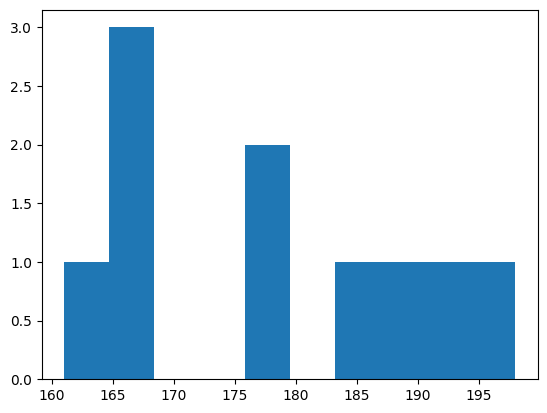

In [33]:
# Create a histogram
plt.hist(x)
plt.show()

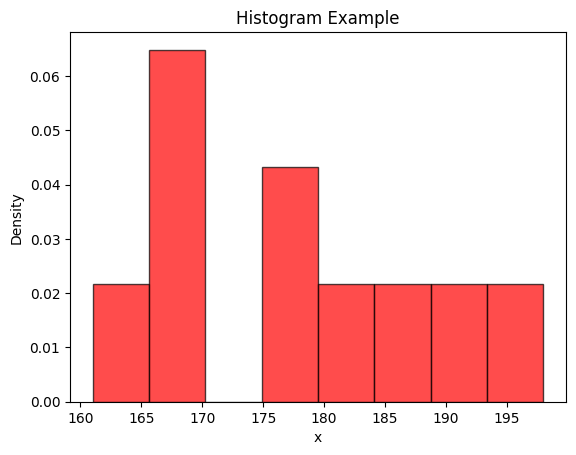

In [34]:
# Customize your histogram
plt.hist(x, bins=8, edgecolor='black', color='red', alpha=0.7, density=True)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram Example')
plt.show()

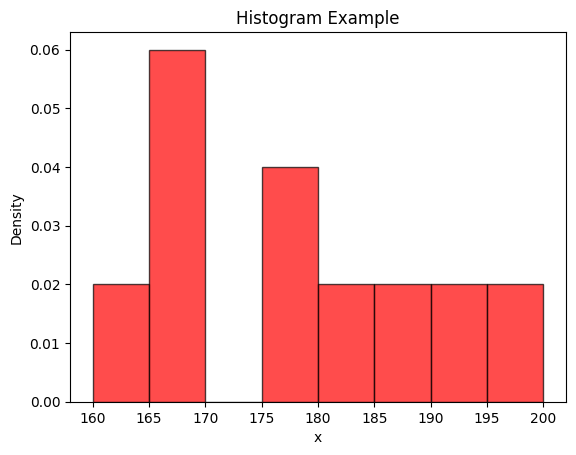

In [35]:
# specifying bin-edges:
plt.hist(x, bins=[160,165,170,175,180,185,190,195,200], edgecolor='black', color='red', alpha=0.7, density=True)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram Example')
plt.show()

Histograms are important - they show how the data is **distributed** <br>

Next week we will talk more about theoretical distributions. <br>

Histograms serve as *empirical distributions* <br>

Based on the histogram above, how would you guess the height-distribution in the *population* looks like? <br> 

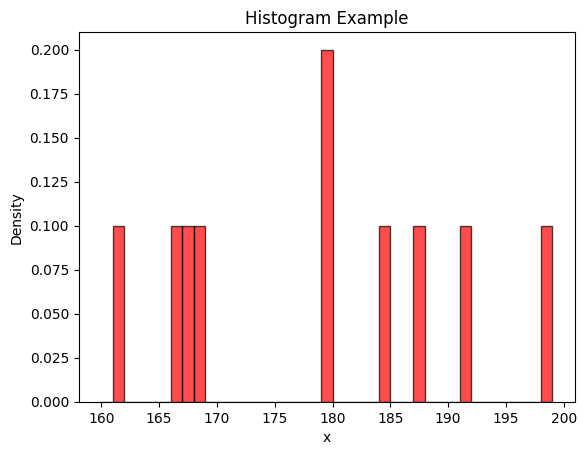

In [39]:
# lets try with really small bins, such that the histogram diplays all the details in the data:
plt.hist(x, bins=np.arange(160,200,1), edgecolor='black', color='red', alpha=0.7, density=True)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram Example')
plt.show()

### Cumulative distribution

The "detailed" histogram with small bins is maybe not the nicest way to display data. <br>

But histograms are dependent on bin-choices, which is also (sometimes) not ideal.. <br>

An alternative is to do a cumulative kind of plot:

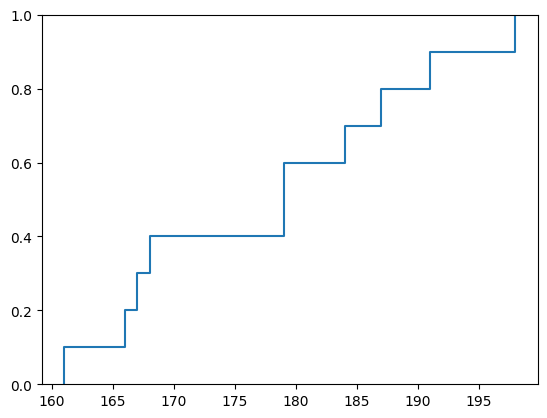

In [40]:
# plot the "empirical cumulated density function"
plt.ecdf(x)
plt.show()

In [43]:
# compare with values 
print(x)

[161 166 167 168 179 179 184 187 191 198]


In the cumulated distribution all detailed information is kept - but is is another way to visualise the distribution of data. 

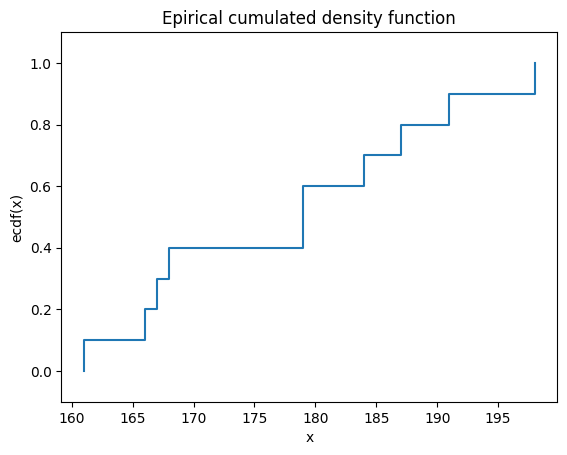

In [44]:
# lets increase the y-range slightly:
plt.ecdf(x)
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('ecdf(x)')
plt.title('Epirical cumulated density function')
plt.show()

The y-range goes from 0 to 1 - or 0% to 100% <br>

Every vertical line-segment is a datapoint <br>

When the plot is "steep" there are many datapoints (corresponds to high values in the histogram). <br>

The cumulated plot can be used to understand the "averaged_inverted_cdf" used for percentiles. <br>

OBS: we will talk more about distributions - and cumulative distributions - over the next couple of weeks. 

### Other plots in Python

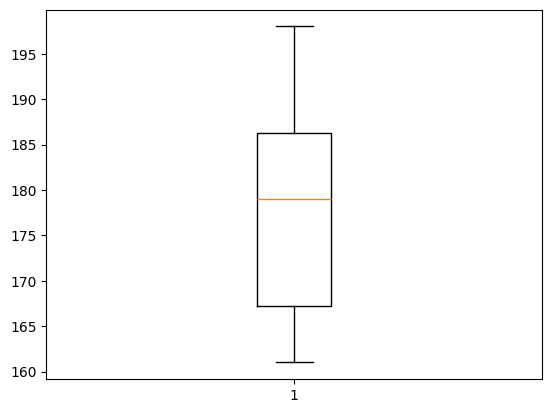

In [58]:
# make a boxplot
plt.boxplot(x)
plt.show()

Now the *values* are on the **y-axis**

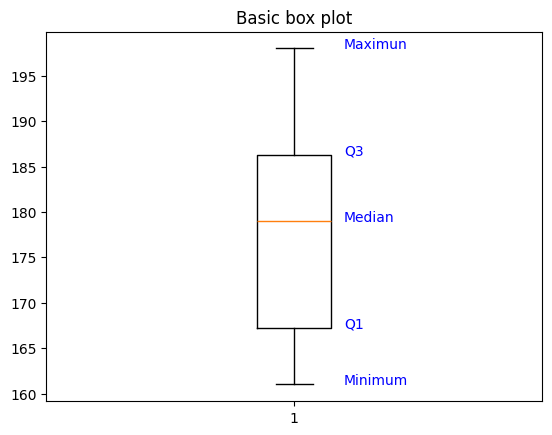

In [61]:
# Adding some explanation:
plt.boxplot(x)
plt.text(1.1, np.percentile(x,  [0]), 'Minimum', color='blue')
plt.text(1.1, np.percentile(x, [25]), 'Q1', color='blue')
plt.text(1.1, np.percentile(x, [50]), 'Median', color='blue')
plt.text(1.1, np.percentile(x, [75]), 'Q3', color='blue')
plt.text(1.1, np.percentile(x,[100]), 'Maximun', color='blue')
plt.title("Basic box plot")
plt.show()

see documentation for definition of box and whiskers: 

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot



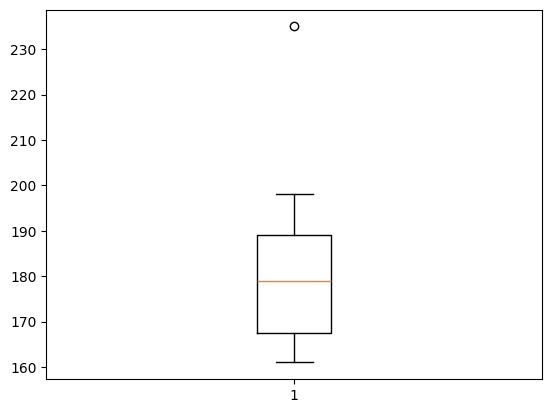

In [62]:
# Adding an outlier to the data:
plt.boxplot(np.append(x, [235]))
plt.show()

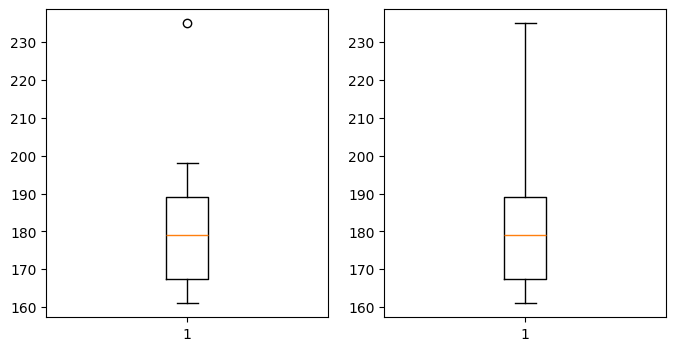

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.boxplot(np.append(x, [235]))
ax2.boxplot(np.append(x, [235]), whis=(0,100))
plt.show()

### Working with data - dataframes

In [64]:
# import the Pandas library
import pandas as pd 

In [65]:
# Make a DataFrame:
data = pd.DataFrame({
    'males':  [152, 171, 173, 173, 178, 179, 180, 180, 182, 182, 182, 185, 
                    185 ,185, 185, 185 ,186 ,187 ,190 ,190, 192, 192, 197], 
    'females':[159, 166, 168 ,168 ,171 ,171 ,172, 172, 173, 174 ,175 ,175,
                    175, 175, 175, 177, 178, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
})
data

males  females
0     152    159.0
1     171    166.0
2     173    168.0
3     173    168.0
4     178    171.0
5     179    171.0
6     180    172.0
7     180    172.0
8     182    173.0
9     182    174.0
10    182    175.0
11    185    175.0
12    185    175.0
13    185    175.0
14    185    175.0
15    185    177.0
16    186    178.0
17    187      NaN
18    190      NaN
19    190      NaN
20    192      NaN
21    192      NaN
22    197      NaN

In [66]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


<Axes: >

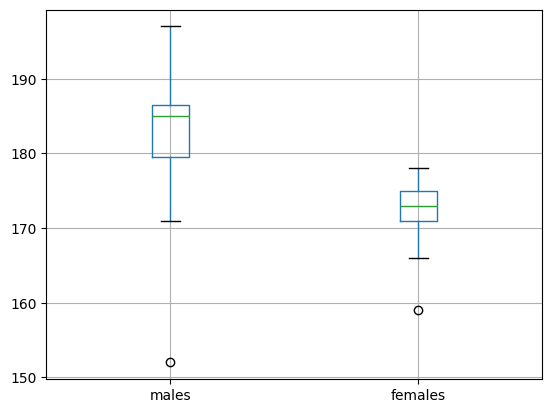

In [67]:
# The DataFrame has a direct method for making a boxplot:
data.boxplot()

### Reading data from an external file

It is very important to learn how to read data from other files. In practice one will never type all the data into Python by hand!

In [68]:
csv_data= pd.read_csv("studentheights.csv", sep=';')

In [69]:
print(type(csv_data))

<class 'pandas.core.frame.DataFrame'>


In [70]:
csv_data.head()

Height Gender
0     152   male
1     171   male
2     173   male
3     173   male
4     178   male

Notice that this DataFrame is differently structured compared to the one from above (which had columns: "males" and "females").

If we wnt to do a boxplot by gender, we need to include the "by=.." argument:

<Axes: title={'center': 'Height'}, xlabel='[Gender]'>

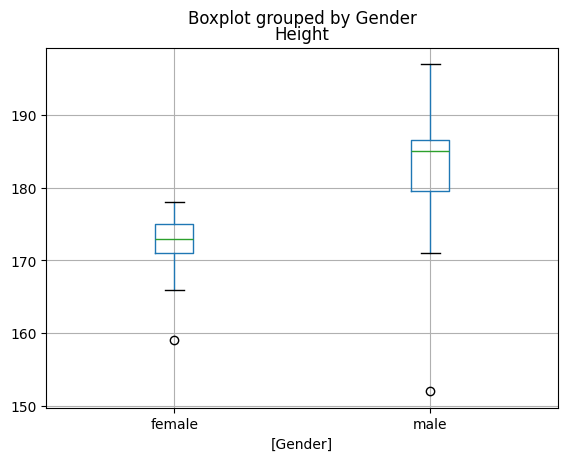

In [73]:
csv_data.boxplot(by='Gender')

See the book for more plots (scatterplots, pie charts etc.)